# Van-der-Pol Work-Precision Diagrams

Adapted from 
[SciMLBenchmarks.jl Can-der-Pol benchmark](https://benchmarks.sciml.ai/html/StiffODE/VanDerPol.html).

In [1]:
# Imports
using LinearAlgebra, Statistics
using OrdinaryDiffEq, ParameterizedFunctions, ODEInterfaceDiffEq, LSODA, Sundials, DiffEqDevTools
using Plots
using ProbNumDiffEq

In [2]:
# Plotting theme
theme(:dao;
    linewidth=8,
    linealpha=0.7,
    markersize=5,
    markerstrokewidth=0.5,
    legend=:outerright,
)

## Problem Definition

In [3]:
# Problem definition and reference solution

van = @ode_def begin
  dy = μ*((1-x^2)*y - x)
  dx = 1*y
end μ

prob = ODEProblem(van,[0;2.],(0.0,6.3),1e6)
abstols = 1.0 ./ 10.0 .^ (5:9)
reltols = 1.0 ./ 10.0 .^ (2:6)

sol = solve(prob,CVODE_BDF(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)
plot(sol, linewidth=1, ylims=(-4, 4))

## Low Order and High Tolerance

### Final timepoint error

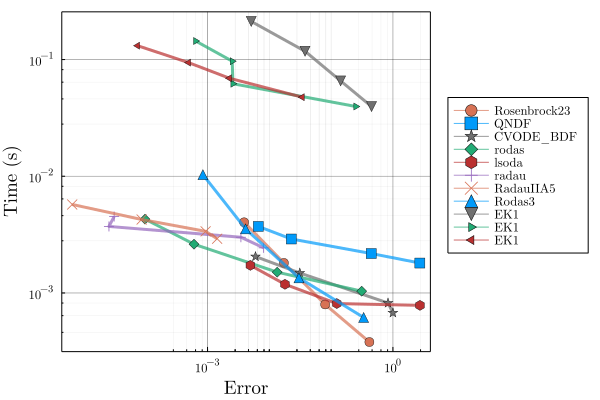

In [4]:
abstols = 1.0 ./ 10.0 .^ (4:7)
reltols = 1.0 ./ 10.0 .^ (1:4)

setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>QNDF()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>rodas()),
          Dict(:alg=>lsoda()),
          Dict(:alg=>radau()),
          Dict(:alg=>RadauIIA5()),
          Dict(:alg=>Rodas3()),
          Dict(:alg=>EK1(order=3, smooth=false)),
          Dict(:alg=>EK1(order=4, smooth=false)),
          Dict(:alg=>EK1(order=5, smooth=false)),
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5),seconds=5)
plot(wp)

### Timeseries Errors

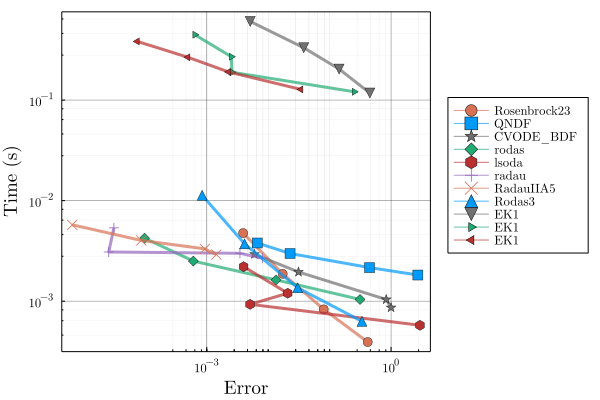

In [5]:
abstols = 1.0 ./ 10.0 .^ (4:7)
reltols = 1.0 ./ 10.0 .^ (1:4)

setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>QNDF()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>rodas()),
          Dict(:alg=>lsoda()),
          Dict(:alg=>radau()),
          Dict(:alg=>RadauIIA5()),
          Dict(:alg=>Rodas3()),
          Dict(:alg=>EK1(order=3)),
          Dict(:alg=>EK1(order=4)),
          Dict(:alg=>EK1(order=5)),
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      error_estimator=:l2,appxsol=test_sol,maxiters=Int(1e5),seconds=5)
plot(wp)

## Higher Accuracy

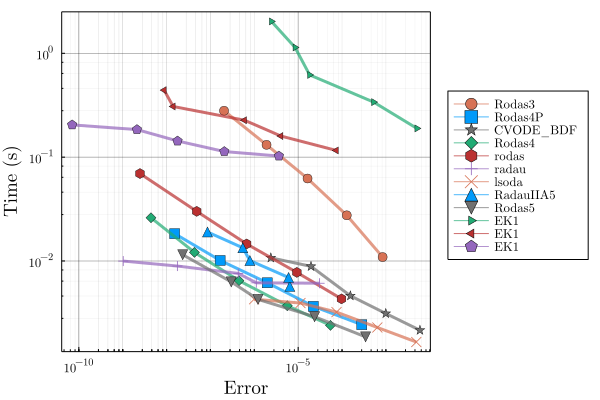

In [6]:
abstols = 1.0 ./ 10.0 .^ (7:11)
reltols = 1.0 ./ 10.0 .^ (4:8)
setups = [Dict(:alg=>Rodas3()),
          #Dict(:alg=>QNDF()),
          Dict(:alg=>Rodas4P()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>Rodas4()),
          Dict(:alg=>rodas()),
          Dict(:alg=>radau()),
          Dict(:alg=>lsoda()),
          Dict(:alg=>RadauIIA5()),
          Dict(:alg=>Rodas5()),
          Dict(:alg=>EK1(order=3, smooth=false)),
          Dict(:alg=>EK1(order=5, smooth=false)),
          Dict(:alg=>EK1(order=7, smooth=false)),
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e6),seconds=5)
plot(wp)

### Timeseries Errors

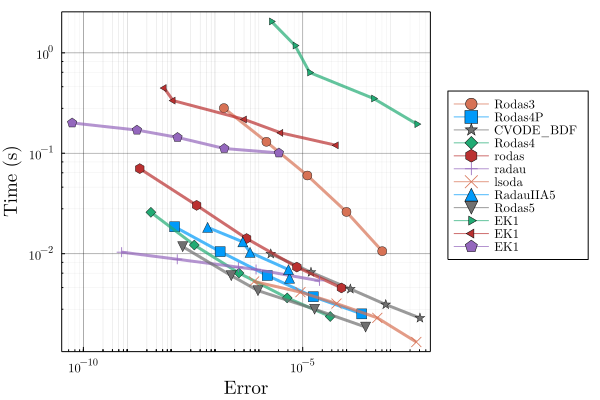

In [7]:
abstols = 1.0 ./ 10.0 .^ (7:11)
reltols = 1.0 ./ 10.0 .^ (4:8)
setups = [Dict(:alg=>Rodas3()),
          #Dict(:alg=>QNDF()),
          Dict(:alg=>Rodas4P()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>Rodas4()),
          Dict(:alg=>rodas()),
          Dict(:alg=>radau()),
          Dict(:alg=>lsoda()),
          Dict(:alg=>RadauIIA5()),
          Dict(:alg=>Rodas5()),
          Dict(:alg=>EK1(order=3, smooth=false)),
          Dict(:alg=>EK1(order=5, smooth=false)),
          Dict(:alg=>EK1(order=7, smooth=false)),
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;error_estimate=:l2,
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e6),seconds=5)
plot(wp)